In [60]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import keras
import seaborn as sns
import scipy.stats as stats
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd
from tensorflow_probability import layers as tfpl
import matplotlib.pyplot as plt

tf.enable_eager_execution()

<Figure size 1080x360 with 0 Axes>

In [61]:
dist = stats.binom

In [66]:
dist.pmf(n=100,p=0.07,k=6),dist.pmf(n=100,p=0.08,k=6)

(0.1528553875880479, 0.12327954956095886)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


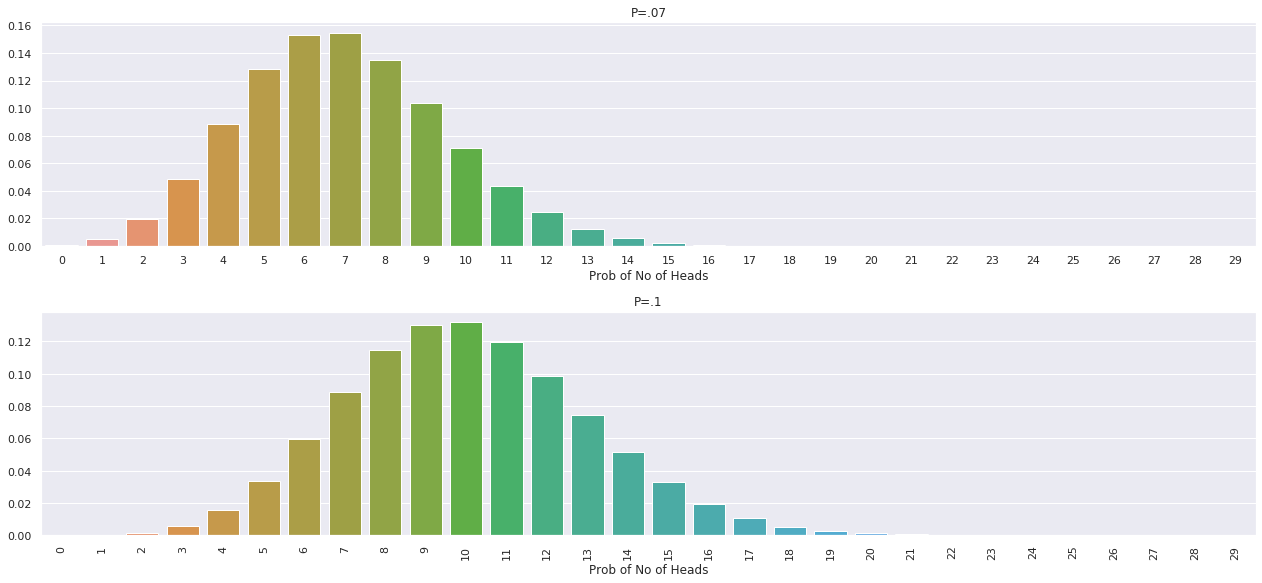

In [111]:

sns.set(rc={'figure.figsize':(17.7,8.27)})

fig, ax =plt.subplots(2,1)

sns.barplot(x= np.arange(30),y=dist.pmf(n=100,p=0.07,k=np.arange(30)),ax=ax[0])
sns.barplot(x= np.arange(30),y=dist.pmf(n=100,p=0.1,k=np.arange(30)),ax=ax[1])
ax[0].set_title("P=.07")
ax[1].set_title("P=.1")
ax[0].set_xlabel("Prob of No of Heads")
ax[1].set_xlabel("Prob of No of Heads")
plt.xticks(rotation=90)
fig.tight_layout()
fig.show()

Text(0.5, 0, 'Likelihood $ theta $')

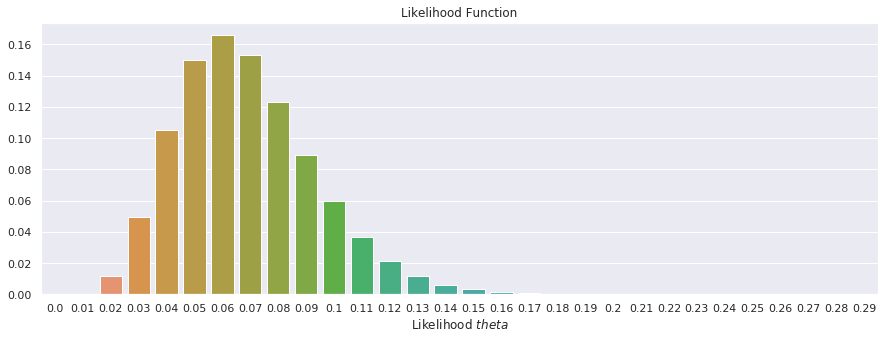

In [118]:

likelihood = [dist.pmf(p=p,k=6,n=100) for p in np.linspace(0.0,1.0,101)]

plt.figure(figsize=(15,5))
sns.barplot(np.linspace(0.0,1.0,101)[:30],y=likelihood[:30])
plt.title("Likelihood Function")
plt.xlabel("Likelihood $ theta $")

In [120]:
## probability that 5 heads come from these two distributions

dist.pmf(p=.8,n=10,k=5),dist.pmf(p=.5,n=10,k=5)

(0.02642411520000004, 0.24609375000000025)

In [122]:
# likelihood ratio 
dist.pmf(p=.5,n=10,k=5)/dist.pmf(p=.8,n=10,k=5)

9.313225746154782

In [126]:
#Let’s say our sample is 3, what is the probability it comes from a distribution of μ = 3 and σ = 1?

print(stats.norm.pdf(3, 3, 1))


#What if it came from a distribution with μ = 7 and σ = 2?

print(stats.norm.pdf(3, 7, 2))



0.3989422804014327
0.02699548325659403


In [159]:
sample = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]
x= np.linspace(0,20,100)
dist1 = stats.norm(7,3)
dist2 = stats.norm(5,3)


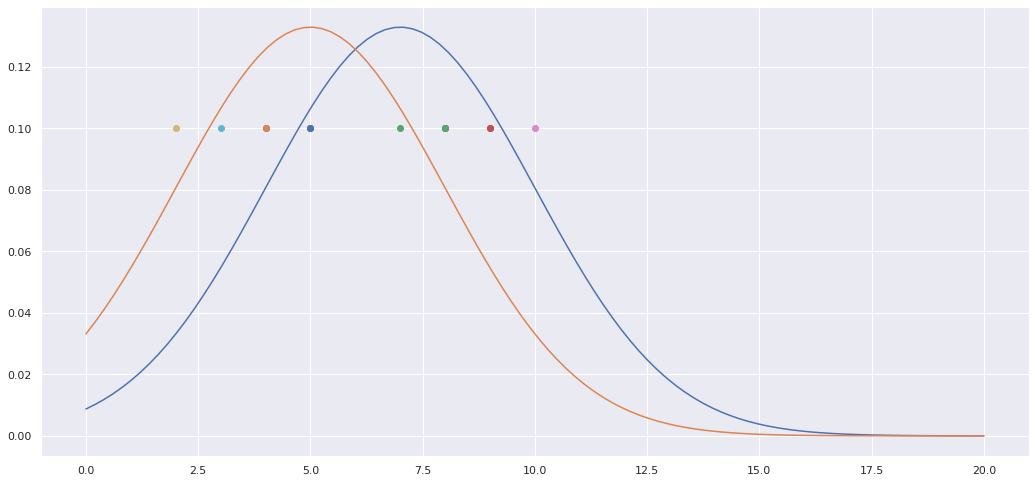

In [160]:
y1  = dist1.pdf(x)
y2  = dist2.pdf(x)
plt.plot(x,y1)
plt.plot(x,y2)
for xs in sample:
    plt.scatter(x = xs,y=.1)

In [170]:
# log likelihood
def calculate(samples,mu1,mu2,sd1,sd2):
    ll1=0
    ll2 =0
    
    for x in samples:
        ll1 += np.log(stats.norm.pdf(x,mu1,sd1))
        ll2 += np.log(stats.norm.pdf(x,mu2,sd2))
    
    print('ll1 {} | ll2 {}'.format(ll1,ll2))


In [171]:
calculate(sample,5,7,3,3)

ll1 -33.967933728441174 | ll2 -33.3012670617745


In [177]:
def compare_data_to_dist(x, mu_1=0, sd_1=3):
    ll_1 = 0
    
    for i in x:
        ll_1 += np.log(stats.norm.pdf(i, mu_1, sd_1))
        
    return ll_1
    #print ("The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_1, sd_1, ll_1))
   

### Maximum Likelihood

In [207]:
ll=[]
mu_=[]
for mu in np.linspace(0,12):
    mu_.append(mu)    
    ll.append(compare_data_to_dist(sample,mu_1=mu))

(-40, -30)

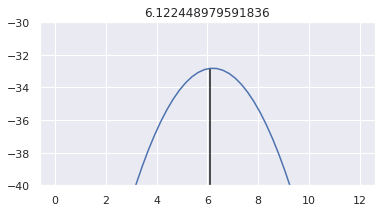

In [213]:
plt.figure(figsize=(6,3))
plt.plot(np.linspace(0,12),ll)
plt.vlines(x=mu_[np.argmax(ll)],ymin=np.min(ll),ymax=np.max(ll))
plt.title(str(mu_[np.argmax(ll)]))
plt.ylim(-40, -30)

In [241]:
def plot_ll(x):
    plt.figure(figsize=(5,8))
    plt.title("Maximim Likelihood Functions")
    plt.xlabel("Mean Estimate")
    plt.ylabel("Log Likelihood")
    plt.ylim(-40, -30)
    plt.xlim(0, 12)
    
    norm = stats.norm    
    mu_set = np.linspace(0, 16, 1000)
    sd_set = [.5, 1, 1.5, 2.5, 3, 3.5]
    max_val = max_val_location = None
    for i in sd_set:
            ll_array = []

            for j in mu_set:
                temp_mm = 0

                for k in x:
                    temp_mm += np.log(norm.pdf(k, j, i)) # The LL function
                ll_array.append(temp_mm)

                if (max_val is None):
                    max_val = max(ll_array)
                elif max(ll_array) > max_val:
                                max_val = max(ll_array)
                                max_val_location = j

                        # Plot the results
            plt.plot(mu_set, ll_array, label="sd: %.1f" % i)

    print( "The max LL for sd %.2f is %.2f" % (i, max(ll_array))    )
    plt.axvline(x=max_val_location, color='black', ls='-.')
    plt.legend(loc='lower left')

The max LL for sd 3.50 is -33.77


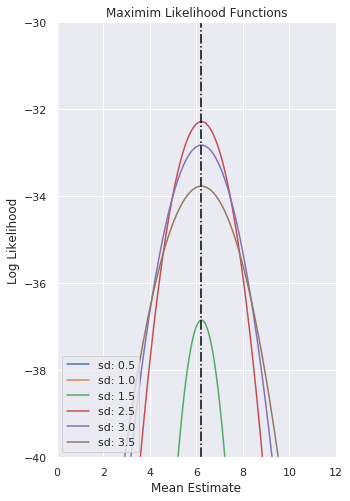

In [242]:
plot_ll(sample)

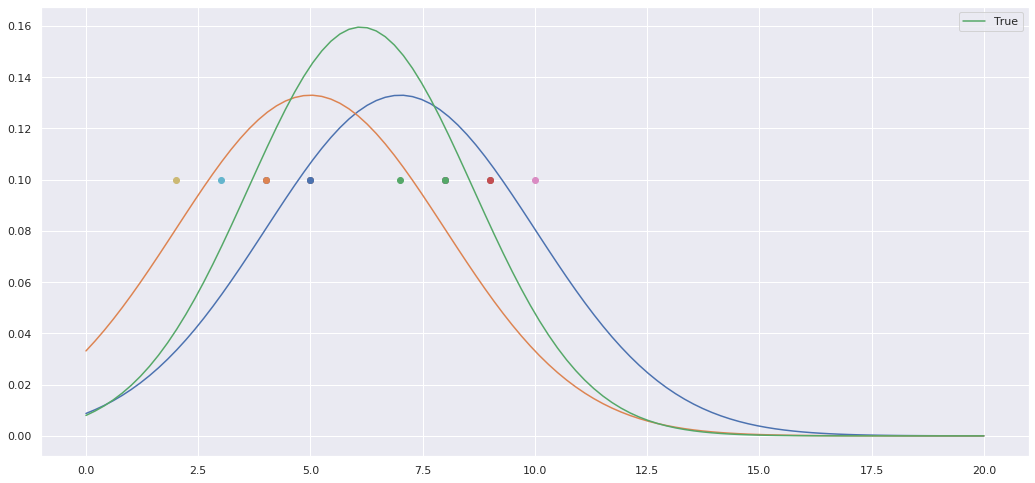

In [244]:
sample = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]
x= np.linspace(0,20,100)
dist1 = stats.norm(7,3)
dist2 = stats.norm(5,3)
disttrue = stats.norm(6.12,2.5)
y1  = dist1.pdf(x)
y2  = dist2.pdf(x)
ytrue = disttrue.pdf(x)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,ytrue,label="True")
for xs in sample:
    plt.scatter(x = xs,y=.1)
    
plt.legend()

In [245]:
import tensorflow_probability as tfp

model = tf.keras.Sequential([
    tfp.layers.DenseFlipout(512, activation=tf.nn.relu),
    tfp.layers.DenseFlipout(10),
])

logits = model(features)
neg_log_likelihood = tf.nn.softmax_cross_entropy_with_logits(
    labels=labels, logits=logits)
kl = sum(model.losses)
loss = neg_log_likelihood + kl
train_op = tf.train.AdamOptimizer().minimize(loss)

NameError: name 'features' is not defined